In [1]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as mp
%matplotlib inline

col_acq = ['LoanID','Channel','SellerName','OrInterestRate','OrUnpaidPrinc','OrLoanTerm',
        'OrDate','FirstPayment','OrLTV','OrCLTV','NumBorrow','DTIRat','CreditScore',
        'FTHomeBuyer','LoanPurpose','PropertyType','NumUnits','OccStatus','PropertyState',
        'Zip','MortInsPerc','ProductType','CoCreditScore','MortInsType','RelMortInd'];

col_per = ['LoanID','MonthRep','Servicer','CurrInterestRate','CAUPB','LoanAge','MonthsToMaturity',
          'AdMonthsToMaturity','MaturityDate','MSA','CLDS','ModFlag','ZeroBalCode','ZeroBalDate',
          'LastInstallDate','ForeclosureDate','DispositionDate','PPRC','AssetRecCost','MHRC',
          'ATFHP','NetSaleProceeds','CreditEnhProceeds','RPMWP','OFP','NIBUPB','PFUPB','RMWPF',
          'FPWA','ServicingIndicator'];

from sklearn import preprocessing

# Choose datasets to be analyzed

In [2]:
x= ['2001','2002',,'2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
y= ['Q1', 'Q2', 'Q3', 'Q4']

In [3]:
z=[]
for i in x:
    for j in y:
        temp = i+j
        z.append(temp)

print(z)

['2001Q1', '2001Q2', '2001Q3', '2001Q4']


In [4]:
df_acq=pd.DataFrame()

for year_quarter in z:
    temp = pd.read_csv(f'/Users/tp/Desktop/FannieMae/Acquisition_All/Acquisition_{year_quarter}.txt', sep='|', names=col_acq, index_col= False)
    df_acq = pd.concat([df_acq, temp], axis=0)
    
df_acq.shape

(3005149, 25)

In [5]:
class_ification= pd.read_csv('/Users/tp/Desktop/FannieMae/classification.csv', sep=';', names=['PropertyState','Avg_Foreclosure_Time', 'Recourse', 'Judicial' ])

df_acq = pd.merge(df_acq, class_ification, how='inner', on='PropertyState')

In [6]:
df_acq= df_acq.drop(['SellerName','OrDate','FirstPayment','PropertyState', 'Zip', 'CoCreditScore', ], axis=1)

In [7]:

df_per=pd.DataFrame()

for year_quarter in z:
    temp = pd.read_csv(f'/Users/tp/Desktop/FannieMae/Performance_All/Performance_{year_quarter}.txt', sep='|', names= col_per, index_col= False, low_memory= False)
    df_per = pd.concat([df_per, temp], axis=0)

df_per.shape


(113278580, 2)

In [8]:
temp

,LoanID,ForeclosureDate
0,100000929081,NaN
1,100000929081,NaN
2,100000929081,NaN
3,100000929081,NaN
4,100000929081,NaN
...,...,...
37636358,999999835148,NaN
37636359,999999835148,NaN
37636360,999999835148,NaN
37636361,999999835148,NaN


In [9]:
df_per.drop_duplicates(subset='LoanID', keep='last', inplace=True)
df = pd.merge(df_acq, df_per, on='LoanID', how='inner')

df.rename(index=str, columns={"ForeclosureDate": 'Default'}, inplace=True)

In [10]:
df['Default'].fillna(0, inplace=True)
df.loc[df['Default'] != 0, 'Default'] = 1

df['Default'] = df['Default'].astype(int)

In [11]:
#df['OrDateMonth'] = df['OrDate'].apply(lambda x: x.split('/')[0].strip()).astype(int)
#df['OrDateYear'] = df['OrDate'].apply(lambda x: x.split('/')[1].strip()).astype(int)

#df['FirstMonth'] = df['FirstPayment'].apply(lambda x: x.split('/')[0].strip()).astype(int)
#df['FirstYear'] = df['FirstPayment'].apply(lambda x: x.split('/')[1].strip()).astype(int)

#df.drop(['OrDate','FirstPayment'], axis=1, inplace=True)

In [12]:

df.drop(['MortInsPerc','MortInsType','ProductType','LoanID'], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2992325 entries, 0 to 2992324
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Channel               object 
 1   OrInterestRate        float64
 2   OrUnpaidPrinc         int64  
 3   OrLoanTerm            int64  
 4   OrLTV                 float64
 5   OrCLTV                float64
 6   NumBorrow             float64
 7   DTIRat                float64
 8   CreditScore           float64
 9   FTHomeBuyer           object 
 10  LoanPurpose           object 
 11  PropertyType          object 
 12  NumUnits              int64  
 13  OccStatus             object 
 14  RelMortInd            object 
 15  Avg_Foreclosure_Time  int64  
 16  Recourse              int64  
 17  Judicial              int64  
 18  Default               int32  
dtypes: float64(6), int32(1), int64(6), object(6)
memory usage: 445.2+ MB


In [14]:
df.groupby('Default').mean().transpose()

Default,0,1
OrInterestRate,6.980133,7.322773
OrUnpaidPrinc,139890.177905,99104.659330
OrLoanTerm,311.325084,338.907633
OrLTV,72.692409,82.650872
OrCLTV,72.950785,82.767502
NumBorrow,1.647948,1.380164
DTIRat,32.980002,35.471642
CreditScore,721.226111,671.508228
NumUnits,1.039794,1.041179
Avg_Foreclosure_Time,180.052829,187.624415


In [15]:
for i in df.columns[df.dtypes == 'object']:
    a = (df.groupby(i).mean())
    print (pd.DataFrame(a).transpose())

Channel                           B              C              R
OrInterestRate             7.031071       7.031368       6.932258
OrUnpaidPrinc         143951.095366  143638.622038  134644.051021
OrLoanTerm               316.297078     319.211014     304.780418
OrLTV                     74.049785      73.281651      71.902148
OrCLTV                    74.297709      73.412987      72.238545
NumBorrow                  1.611933       1.647281       1.659865
DTIRat                    32.996946      33.845474      32.529986
CreditScore              714.557524     721.743435     723.053499
NumUnits                   1.047913       1.034990       1.038672
Avg_Foreclosure_Time     175.836713     177.166680     184.063233
Recourse                   0.668345       0.689387       0.706577
Judicial                   0.400844       0.423357       0.447076
Default                    0.017702       0.010640       0.008760
FTHomeBuyer                       N              U              Y
OrInterest

In [16]:
df.columns[df.dtypes=='object']

Index(['Channel', 'FTHomeBuyer', 'LoanPurpose', 'PropertyType', 'OccStatus',
       'RelMortInd'],
      dtype='object')

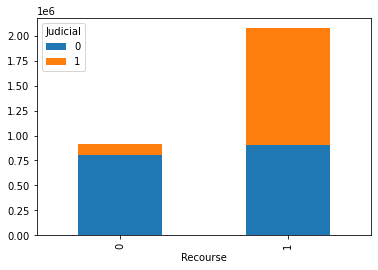

In [17]:
pd.crosstab(df.Recourse, df.Judicial).plot(kind='bar', stacked = True)

In [18]:
columns = df.columns[df.isnull().any()]
nan_cols = df[columns]

df.drop(nan_cols.columns, axis=1, inplace=True)

cat = df.select_dtypes(include=['object'])
num = df.drop(cat.columns, axis=1)

data = pd.DataFrame()
for i in cat.columns:
    tmp = pd.get_dummies(cat[i], prefix = i, drop_first=True)
    data = pd.concat([data, tmp], axis=1)

df = pd.concat([num,data,nan_cols], axis=1).reset_index(drop=True)


In [19]:
columns = df.columns[df.isnull().any()]
for column in columns:
    col_mean = df.loc[df[column].notnull(), column].values.mean()
    df.loc[df[column].isnull(), column] = col_mean

In [20]:
float_y = df.columns[df.dtypes=='float64']
for i in float_y:
    df[i].astype(int)

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
X = df.loc[:, df.columns != 'Default']

y= df.loc[:, df.columns == 'Default']

In [23]:
os = SMOTE(random_state=0)

In [24]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [25]:
print(X_train.shape)
print(type(X_train))
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2094627, 26)
<class 'pandas.core.frame.DataFrame'>
(897698, 26)
(2094627, 1)
(897698, 1)


In [26]:
os_X, os_y =  os.fit_sample(X_train,y_train)

In [27]:
os_X

,OrUnpaidPrinc,OrLoanTerm,OrLTV,NumUnits,Avg_Foreclosure_Time,Recourse,Judicial,Channel_C,Channel_R,FTHomeBuyer_U,...,PropertyType_PU,PropertyType_SF,OccStatus_P,OccStatus_S,RelMortInd_Y,OrInterestRate,OrCLTV,NumBorrow,DTIRat,CreditScore
0,274000,360,80.000000,1,173,1,0,0,0,0,...,0,1,1,0,0,6.625000,80.000000,1.000000,34.000000,688.000000
1,50000,120,38.000000,1,75,1,1,0,0,0,...,0,1,1,0,0,6.500000,38.000000,1.000000,33.008443,756.000000
2,160000,360,78.000000,1,360,1,0,1,0,0,...,0,1,1,0,0,7.125000,78.000000,2.000000,22.000000,692.000000
3,85000,240,62.000000,1,150,0,0,0,0,0,...,0,0,1,0,0,6.750000,62.000000,1.000000,56.000000,691.000000
4,246000,360,75.000000,1,173,1,0,1,0,0,...,0,1,1,0,0,6.875000,75.000000,2.000000,33.008443,750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4141243,76000,360,93.545988,1,173,1,0,0,0,0,...,0,0,1,0,0,7.500000,93.545988,1.000000,41.501466,602.955479
4141244,33000,360,77.326636,1,267,0,0,1,0,0,...,0,1,0,0,0,7.181488,77.326636,1.548097,21.586148,757.749466
4141245,75000,360,87.091589,1,217,1,1,0,0,0,...,0,1,1,0,0,6.802290,87.091589,1.000000,30.091589,665.300748
4141246,222000,360,93.274150,1,37,1,0,0,1,0,...,1,0,1,0,0,7.385299,93.274150,1.808239,43.781256,647.752833


In [28]:
data_final_vars=df.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_X, os_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

E:\mojeProgramy\Anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
E:\mojeProgramy\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\mojeProgramy\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

[False  True  True  True False  True  True  True  True False  True  True
  True False False  True  True  True  True  True False  True  True  True
  True  True]
[3 1 1 1 2 1 1 1 1 6 1 1 1 7 4 1 1 1 1 1 5 1 1 1 1 1]


E:\mojeProgramy\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
columns = df.columns.values.tolist()

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [31]:
logre = LogisticRegression()

In [56]:
rfe = RFE(logre, 10)

E:\mojeProgramy\Anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [57]:
rfe.fit(os_X, os_y.values.ravel())

E:\mojeProgramy\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\mojeProgramy\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [58]:
supp = rfe.support_

In [59]:
to_be_used = pd.concat([pd.DataFrame(df.columns), pd.DataFrame(rfe.support_)], axis=1, ignore_index= True)

In [60]:
to_be_used

,0,1
0,OrUnpaidPrinc,False
1,OrLoanTerm,False
2,OrLTV,False
3,NumUnits,True
4,Avg_Foreclosure_Time,False
5,Recourse,False
6,Judicial,False
7,Default,True
8,Channel_C,True
9,Channel_R,False


In [61]:
tbu = to_be_used[to_be_used[1]==True][0].tolist()

In [62]:
tbu

['NumUnits',
 'Default',
 'Channel_C',
 'FTHomeBuyer_Y',
 'LoanPurpose_P',
 'PropertyType_CP',
 'PropertyType_MH',
 'PropertyType_PU',
 'PropertyType_SF',
 'OccStatus_P']

In [63]:
tbu.remove('Default')
tbu

['NumUnits',
 'Channel_C',
 'FTHomeBuyer_Y',
 'LoanPurpose_P',
 'PropertyType_CP',
 'PropertyType_MH',
 'PropertyType_PU',
 'PropertyType_SF',
 'OccStatus_P']

In [64]:
print(rfe.ranking_)

[13 11  8  1 12  6  5  1  1 16  3  1  1 17 14  1  1  1  1  1 15  2  7  4
 10  9]


In [65]:
X = os_X[tbu]

In [66]:
y= os_y['Default']

In [67]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.602947
         Iterations 10
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.130       
Dependent Variable: Default          AIC:              4993922.1729
Date:               2020-08-26 22:03 BIC:              4994041.3015
No. Observations:   4141248          Log-Likelihood:   -2.4970e+06 
Df Model:           8                LL-Null:          -2.8705e+06 
Df Residuals:       4141239          LLR p-value:      0.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     10.0000                                        
-------------------------------------------------------------------
                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
NumUnits           1.6557   0.0036  455.8635 0.0000  1.6486  1.6629
Channel_C         -1.4478   0.0032 -454.